## SPEX I/O Functions

In [86]:
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter,OmeZarrWriter
from tifffile import imread, imsave, TiffWriter, imwrite, TiffFile
import json

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [89]:
zarrpath='/gne/data/pathology/t3imagedata/Projects/H2022-178_DPACmouseIMC/Scan/TAR2022-154_exp5_human23plex/HP-237690_IMC_220725-160200_SSF-SO_ROI_001.ome.zarr/0'
ometiffpath='/gne/data/pathology/t3imagedata/Projects/H2022-178_DPACmouseIMC/Scan/TAR2022-154_exp5_human23plex/HP-237690_IMC_220725-160200_SSF-SO_ROI_001.ome.tiff'

mibipath='/gne/data/pathology/t3imagedata/Projects/H2020-428/Images/PAC0002_KerenMIBI/Converted/TA459_multipleCores2_Run-4_Point1.tiff'
output='/gne/data/pathology/t3imagedata/Projects/H2020-428/Images/PAC0002_KerenMIBI/Converted/TA459_multipleCores2_Run-4_Point1.zarr/0'

In [92]:
def convert_mibitiff2zarr(inputpath, outputpath):
    """convert mibi tiff to zarr

    Parameters
    ----------
    inputpath : Path of tiff file
    outputpath : Path of ometiff or omezarr file. Note: for omezarr, the path must end in *.zarr/0
    
    """
    img = AICSImage(inputpath)
    im_array=img.get_image_data("ZYX", T=0,C=0)
    
    Channel_list = []
    with TiffFile(inputpath) as tif:
        for page in tif.pages:
            # get tags as json
            description = json.loads(page.tags['ImageDescription'].value)
            Channel_list.append(description['channel.target'])
    
    writer = OmeZarrWriter(output)
    writer.write_image(im_array, image_name="Image:0", dimension_order="CYX",channel_names=Channel_list,scale_num_levels=4,physical_pixel_sizes=None,channel_colors=None)
    
    print('conversion complete')
    
def load_image(imgpath):
    
    """Load image and check/correct for dimension ordering

    Parameters
    ----------
    img : Path of ometiff or omezarr file. Note: for omezarr, the path must end in *.zarr/0
    
    Returns
    -------
    Image Stack : 2D numpy array
    Channels : list

    """

    img = AICSImage(imgpath)
    
    dims=['T','C','Z']
    shape=list(img.shape)
    channel_dim=dims[shape.index(max(shape[0:3]))]

    array=img.get_image_data(channel_dim+"YX")

    channel_list=img.channel_names

    if len(channel_list) != array.shape[0]:
        channel_list=[]
        with TiffFile(imgpath) as tif:
            for page in tif.pages:
                # get tags as json
                description = json.loads(page.tags['ImageDescription'].value)
                channel_list.append(description['channel.target'])
    
    return array, channel_list

['Au',
 'Background',
 'Beta catenin',
 'Ca',
 'CD11b',
 'CD11c',
 'CD138',
 'CD16',
 'CD20',
 'CD209',
 'CD3',
 'CD31',
 'CD4',
 'CD45',
 'CD45RO',
 'CD56',
 'CD63',
 'CD68',
 'CD8',
 'dsDNA',
 'EGFR',
 'Fe',
 'FoxP3',
 'H3K27me3',
 'H3K9ac',
 'HLA-DR',
 'HLA_Class_1',
 'IDO',
 'Keratin17',
 'Keratin6',
 'Ki67',
 'Lag3',
 'MPO',
 'Na',
 'P',
 'p53',
 'Pan-Keratin',
 'PD-L1',
 'PD1',
 'phospho-S6',
 'Si',
 'SMA',
 'Ta',
 'Vimentin']

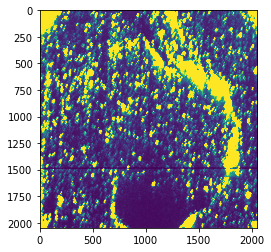

In [64]:
imgmibi,channel1 = load_image(mibipath)

plt.imshow(imgmibi[0,:,:],vmax=imgmibi[0,:,:].mean())
channel1

['SMA',
 'COL1A1',
 'dsDNA+HH3',
 '131Xe',
 '138Ba',
 'DC-LAMP',
 'CD4',
 'CD11c',
 'CD21',
 'CD31',
 'Ki67',
 'CD14',
 'CD68',
 'CD8',
 'CD3e',
 'PNAd',
 'CD44',
 'Vimentin',
 'CD163',
 'PanCK',
 'CD20',
 'CD90',
 'HLA-DR',
 'CK17',
 'CD45',
 'Na-K-ATPase',
 '191Ir',
 '193Ir',
 '208Pb']

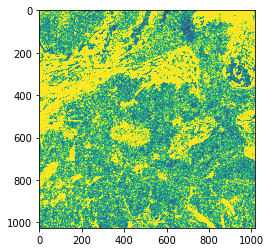

In [65]:
imgzarr,channel1 = load_image(zarrpath)

plt.imshow(imgzarr[0,:,:],vmax=imgzarr[0,:,:].mean())
channel1

['SMA',
 'COL1A1',
 'dsDNA+HH3',
 '131Xe',
 '138Ba',
 'DC-LAMP',
 'CD4',
 'CD11c',
 'CD21',
 'CD31',
 'Ki67',
 'CD14',
 'CD68',
 'CD8',
 'CD3e',
 'PNAd',
 'CD44',
 'Vimentin',
 'CD163',
 'PanCK',
 'CD20',
 'CD90',
 'HLA-DR',
 'CK17',
 'CD45',
 'Na-K-ATPase',
 '191Ir',
 '193Ir',
 '208Pb']

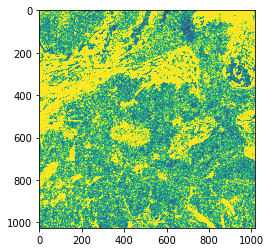

In [66]:
imgtiff,channel2 = load_image(ometiffpath)

plt.imshow(imgtiff[0,:,:],vmax=imgtiff[0,:,:].mean())
channel2

In [93]:
convert_mibitiff2ometiff(mibipath, output)

conversion complete


['Au',
 'Background',
 'Beta catenin',
 'Ca',
 'CD11b',
 'CD11c',
 'CD138',
 'CD16',
 'CD20',
 'CD209',
 'CD3',
 'CD31',
 'CD4',
 'CD45',
 'CD45RO',
 'CD56',
 'CD63',
 'CD68',
 'CD8',
 'dsDNA',
 'EGFR',
 'Fe',
 'FoxP3',
 'H3K27me3',
 'H3K9ac',
 'HLA-DR',
 'HLA_Class_1',
 'IDO',
 'Keratin17',
 'Keratin6',
 'Ki67',
 'Lag3',
 'MPO',
 'Na',
 'P',
 'p53',
 'Pan-Keratin',
 'PD-L1',
 'PD1',
 'phospho-S6',
 'Si',
 'SMA',
 'Ta',
 'Vimentin']

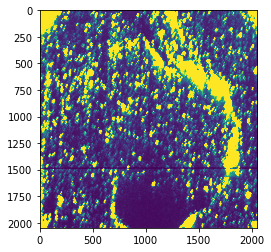

In [94]:
imgzarr,channel1 = load_image(output)

plt.imshow(imgzarr[0,:,:],vmax=imgzarr[0,:,:].mean())
channel1